# Natural Biodiversity Data Science Project

## Scope
The following data science project aims to provide meaningful information about the state of the species present today in national parks. Ansewring the following questions, we aim to provide a strong foundation to preserve and protect endangered species today, while also providing a snapshot of the current state of national parks.
### Questions
1. What endagered species are present today in natural parks?
2. Which species are the most endangered today?
3. What are the most common and least common species found in national parks today?

## Analysis
### Initial Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")


In [2]:
# Initial exploratory analysis
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Currently, al species that are not endangered have missing values in the species_info.csv. Assuming that this species are not endangered, let's replace al missing values with the 'Least Concern' category used in biology to denote species that do not face inminent extintion danger in any capacity.

In [4]:
# Replace missing values with "Least Concern" in column: 'conservation_status'
species = species.fillna({'conservation_status': "Least Concern"})

Let's plot the amount of threatened species by category with bar plots.

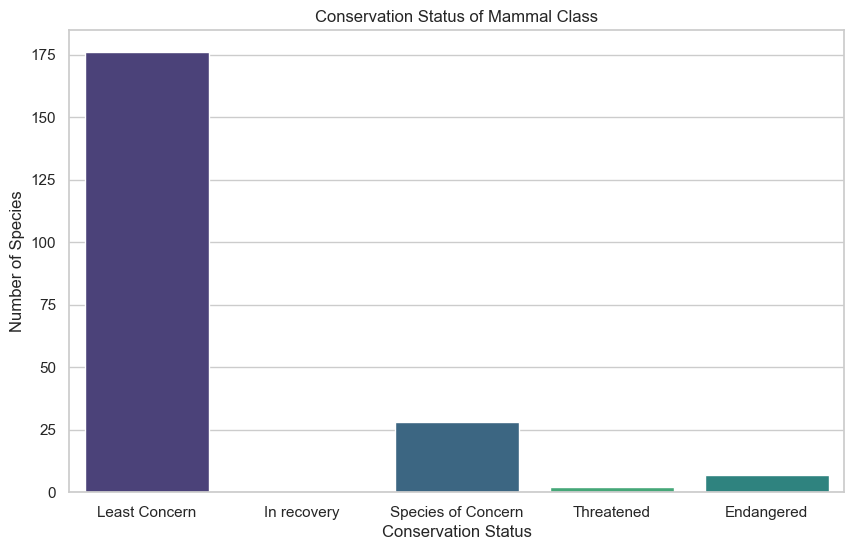

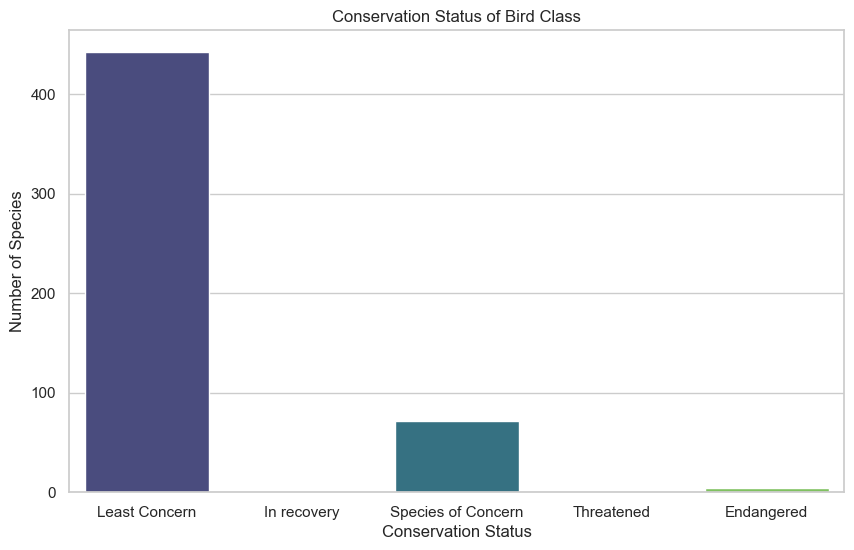

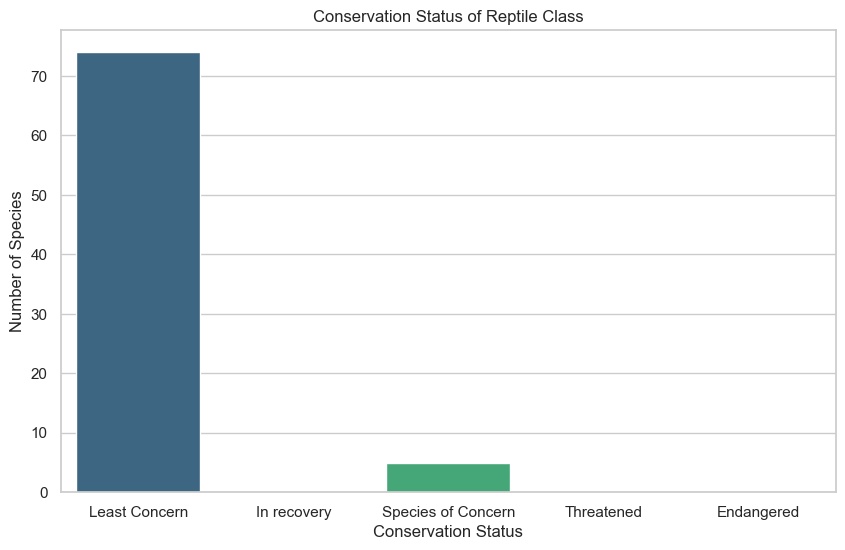

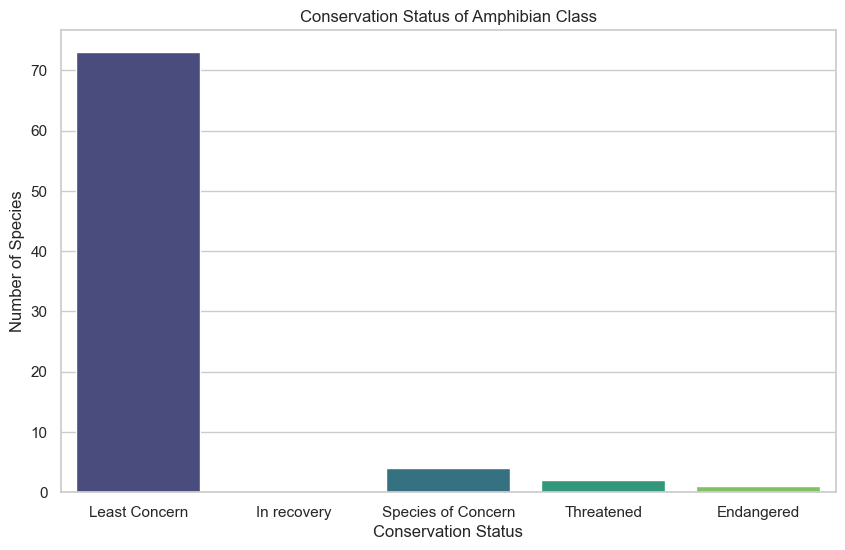

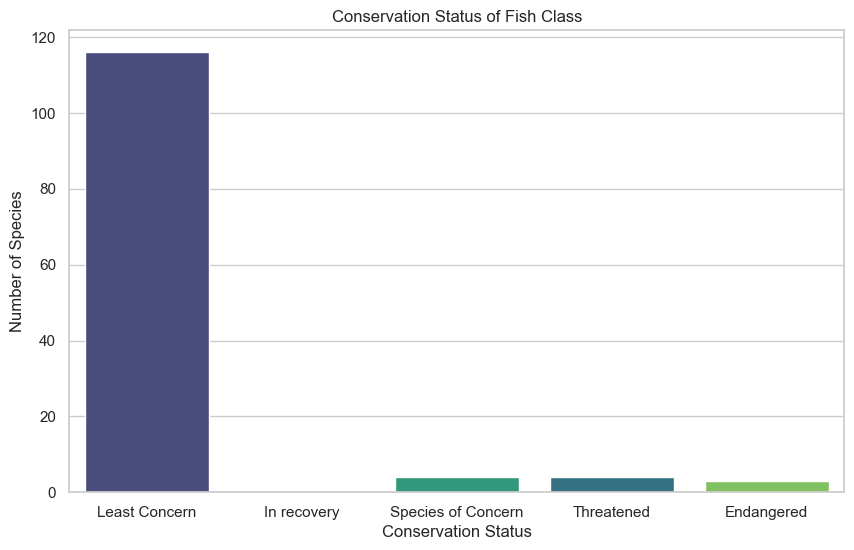

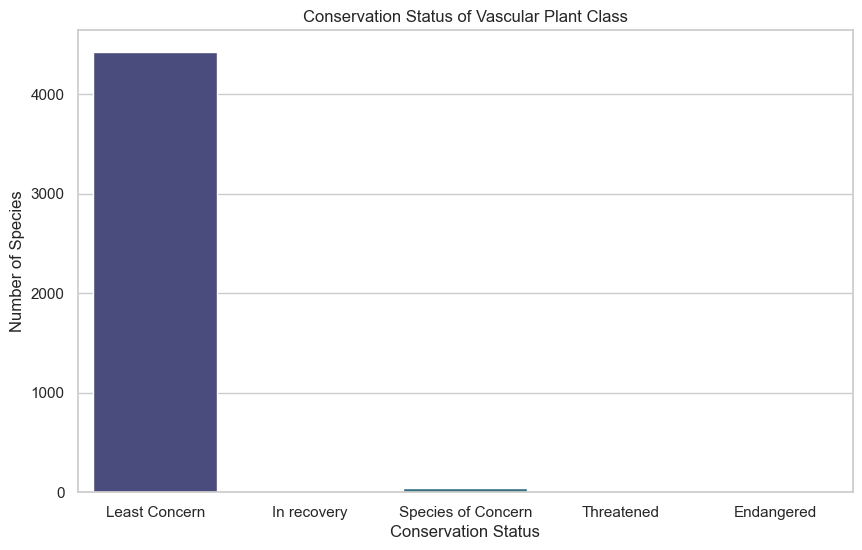

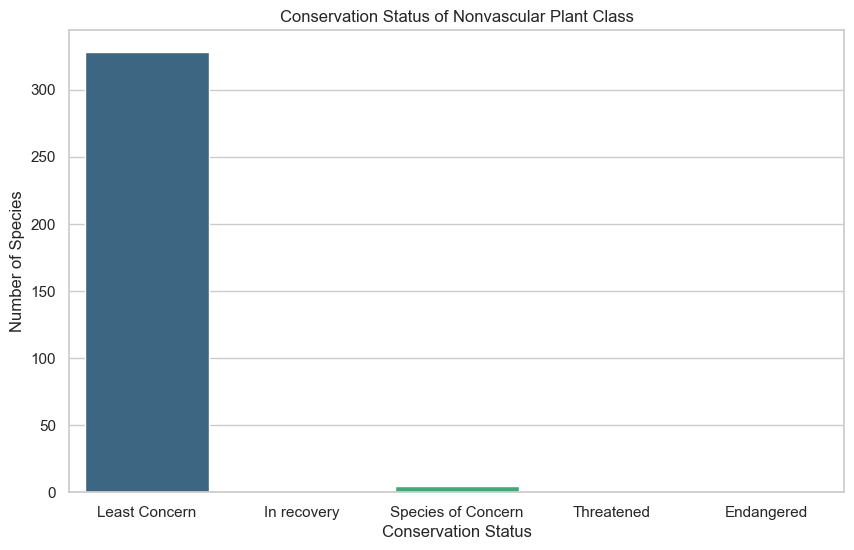

In [5]:
# Create a loop to iterate

#  Class taxonomic rank as category array (class is a privileged word in Python)
categories = species["category"].unique()

# Conservation status array
conservation_status = species["conservation_status"].unique()
conservation_order = ['Least Concern', 'In recovery', 'Species of Concern', 'Threatened', 'Endangered']

# Iterate over the classes in the category array
for category in categories:
    # Filter the data for the current category
    category_data = species[species["category"] == category]
        
    # Plot the bar plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.countplot(x="conservation_status", data=category_data, order=conservation_order, palette='viridis', hue="conservation_status")
    plt.title(f'Conservation Status of {category} Class')
    plt.xlabel('Conservation Status')
    plt.ylabel('Number of Species')
    # plt.legend(title='Conservation Status', bbox_to_anchor=(1, 1))
    plt.show()



Well, the Least Concern category is quite numerous. Let's ignore it so we can focus in the other Conservation Status.

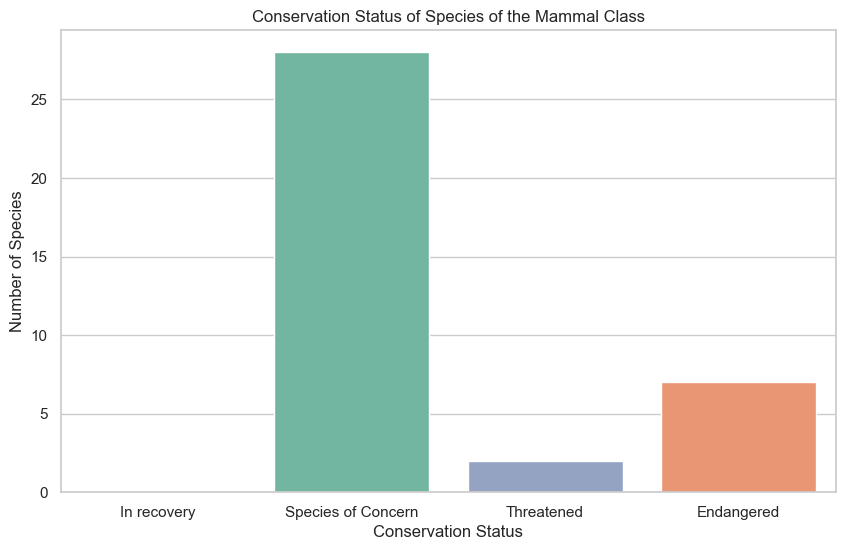

C:\Users\franc\AppData\Local\Temp\ipykernel_5780\916878049.py:28: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x="conservation_status", data=category_data, order=conservation_order, palette=colors, hue="conservation_status", legend=False)


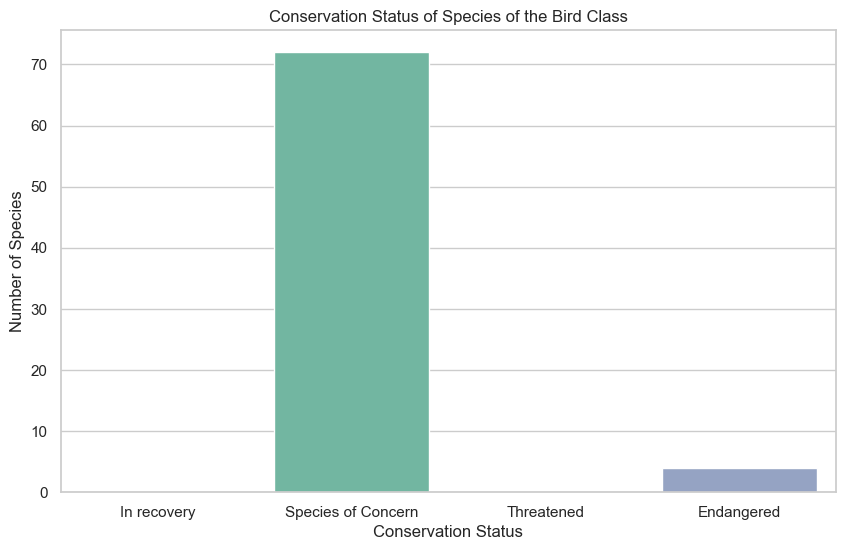

C:\Users\franc\AppData\Local\Temp\ipykernel_5780\916878049.py:28: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.countplot(x="conservation_status", data=category_data, order=conservation_order, palette=colors, hue="conservation_status", legend=False)


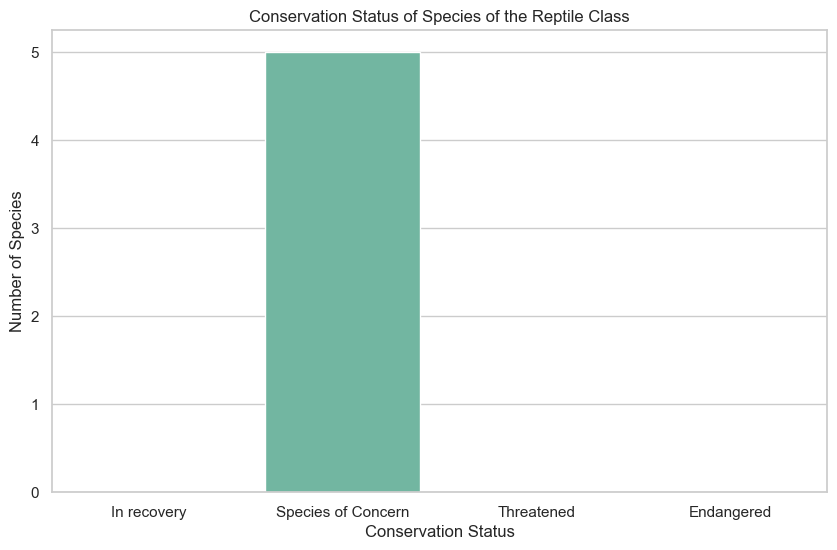

C:\Users\franc\AppData\Local\Temp\ipykernel_5780\916878049.py:28: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x="conservation_status", data=category_data, order=conservation_order, palette=colors, hue="conservation_status", legend=False)


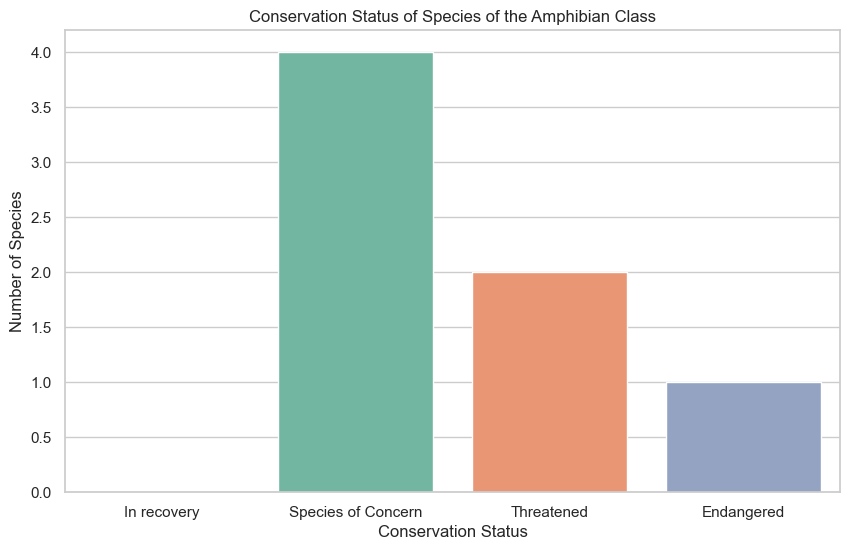

C:\Users\franc\AppData\Local\Temp\ipykernel_5780\916878049.py:28: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x="conservation_status", data=category_data, order=conservation_order, palette=colors, hue="conservation_status", legend=False)


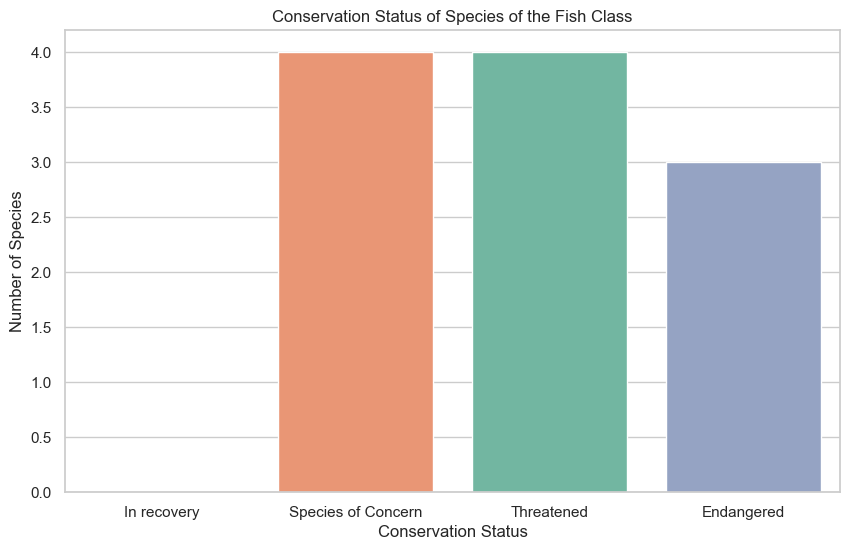

C:\Users\franc\AppData\Local\Temp\ipykernel_5780\916878049.py:28: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x="conservation_status", data=category_data, order=conservation_order, palette=colors, hue="conservation_status", legend=False)


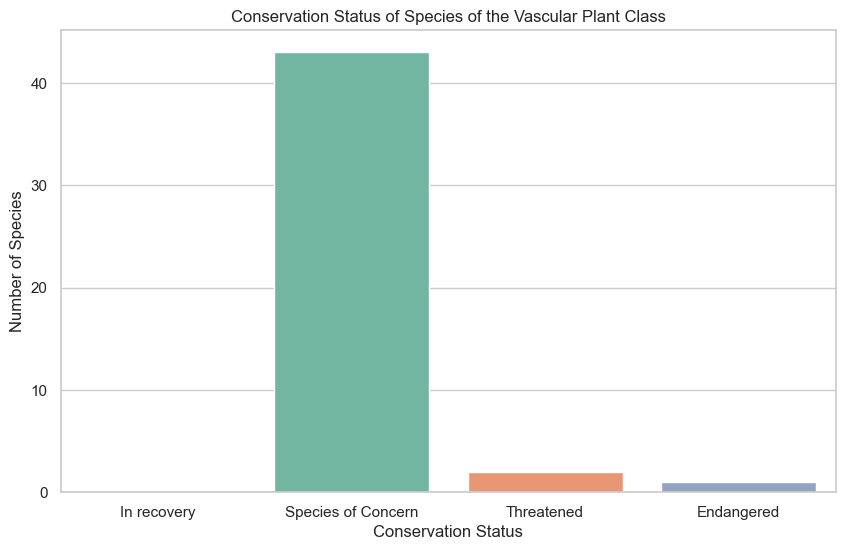

C:\Users\franc\AppData\Local\Temp\ipykernel_5780\916878049.py:28: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.countplot(x="conservation_status", data=category_data, order=conservation_order, palette=colors, hue="conservation_status", legend=False)


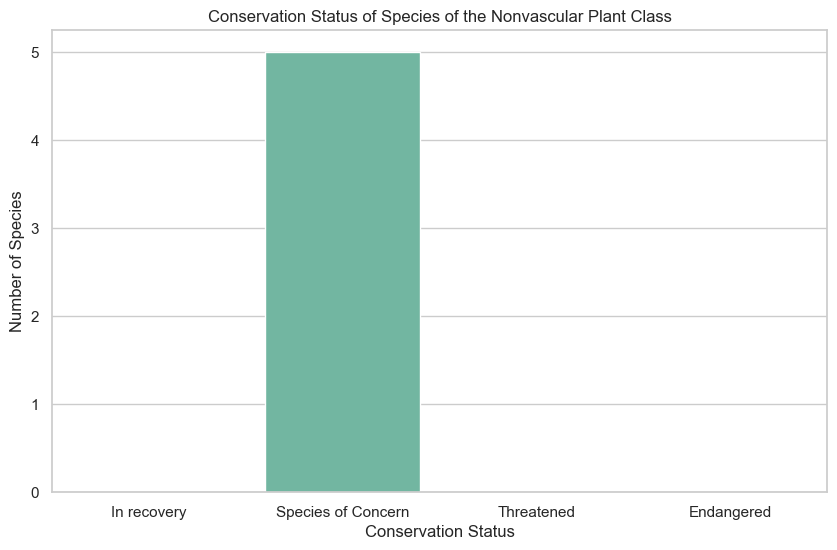

In [85]:
import os
# Recreate the bar plot without the 'Least Concern' category

#  Class taxonomic rank as category array (class is a privileged word in Python)
categories = species["category"].unique()

# Conservation status array
conservation_status = species["conservation_status"].unique()

# Set the order of conservation statuses for better visualization
conservation_order = ['In recovery', 'Species of Concern', 'Threatened', 'Endangered']

# Set a consistent color palette
colors = sns.color_palette('Set2', n_colors=len(conservation_order))

# Output directory to save the plots
output_directory = 'output_plots'
os.makedirs(output_directory, exist_ok=True)

# Iterate over the classes in the category array
for category in categories:
    # Filter data for the current category and exclude 'Least Concern'
    category_data = species[(species['category'] == category) & (species['conservation_status'] != 'Least Concern')]
        
    # Plot the bar plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.countplot(x="conservation_status", data=category_data, order=conservation_order, palette=colors, hue="conservation_status", legend=False)
    plt.title(f'Conservation Status of Species of the {category} Class')
    plt.xlabel('Conservation Status')
    plt.ylabel('Number of Species')

    # Save the plot as a PNG file
    output_file_path = os.path.join(output_directory, f'{category}_conservation_status_plot.png')
    plt.savefig(output_file_path, bbox_inches='tight')
    plt.show()

Great. We got a sense of what is the distribution of conservation species across classes of living beings. Now, let's compare to each other class with are the most threathened.
Now, lets compare the proportion of "At risk" and "Secure" conservation status.
- Secure
1. Least Concern
2. In recovery
- At risk
1. Species of Concern
2. Threatened
3. Endangered

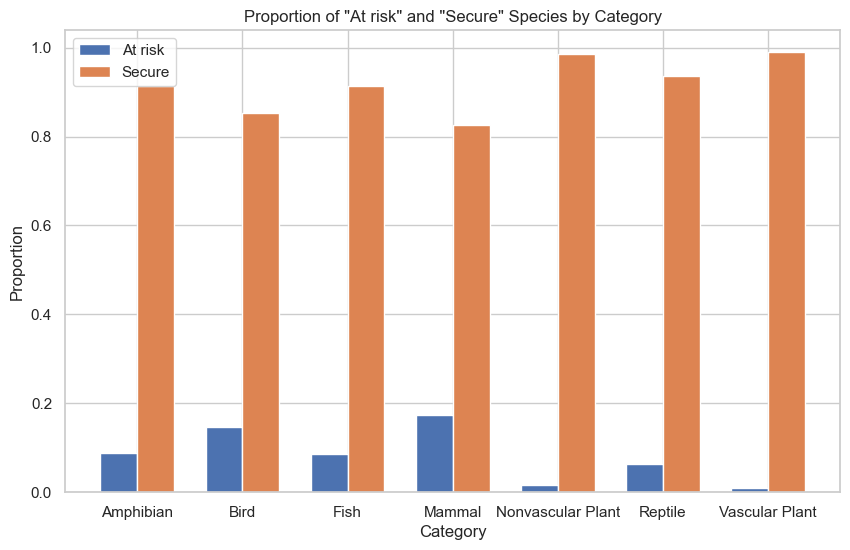

In [7]:
import numpy as np
# Map conservation statuses to new categories
status_mapping = {
    'Least Concern': 'Secure',
    'In recovery': 'Secure',
    'Species of Concern': 'At risk',
    'Threatened': 'At risk',
    'Endangered': 'At risk',
}

# Crate a new column called 'risk_assesment' and apply a mapping
species['risk_assesment'] = species['conservation_status'].map(status_mapping)

# Create a new data frame that reflects the count of species at risk per category
species_by_category = species.groupby(['category', 'risk_assesment']).size().unstack(fill_value=0)

# Add new columns that reflect the proportion of each value of risk assesment
species_by_category['at_risk_proportion'] = species_by_category['At risk'] / (species_by_category['At risk'] + species_by_category['Secure'])
species_by_category['secure_proportion'] = species_by_category['Secure'] / (species_by_category['At risk'] + species_by_category['Secure'])

# Plot the grouped bar plot using Matplotlib
categories = species_by_category.index
bar_width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'At risk' bars
ax.bar(np.arange(len(categories)), species_by_category['at_risk_proportion'], width=bar_width, label='At risk')

# Plot 'Secure' bars
ax.bar(np.arange(len(categories)) + bar_width, species_by_category['secure_proportion'], width=bar_width, label='Secure')

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(len(categories)) + bar_width / 2)
ax.set_xticklabels(categories)

# Set labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of "At risk" and "Secure" Species by Category')

# Add legend
ax.legend()

# Save the plot as a PNG file
output_file_path = os.path.join(output_directory, f'at_risk_assesment_per_category.png')
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()




Let's try to make a grouped bar that shows all of the conservation statuses per category.

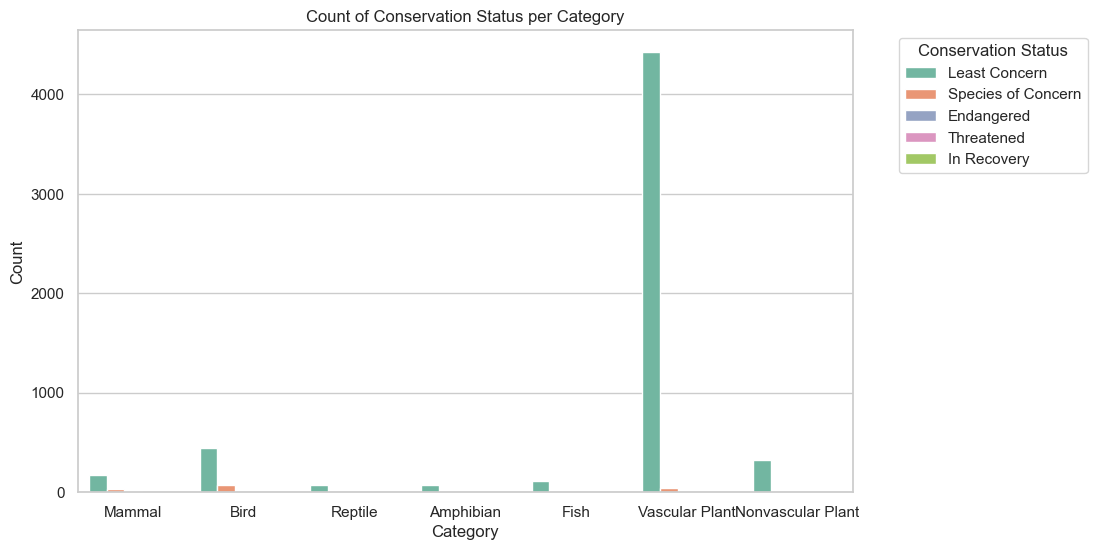

In [8]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(x="category", hue="conservation_status", data=species, palette="Set2")

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Conservation Status per Category')

# Add legend
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


The bar for Vascular Plants' Least Concern species is too numerous and eclipses the other data. Lets show the data in percentages of the total of rows per category.

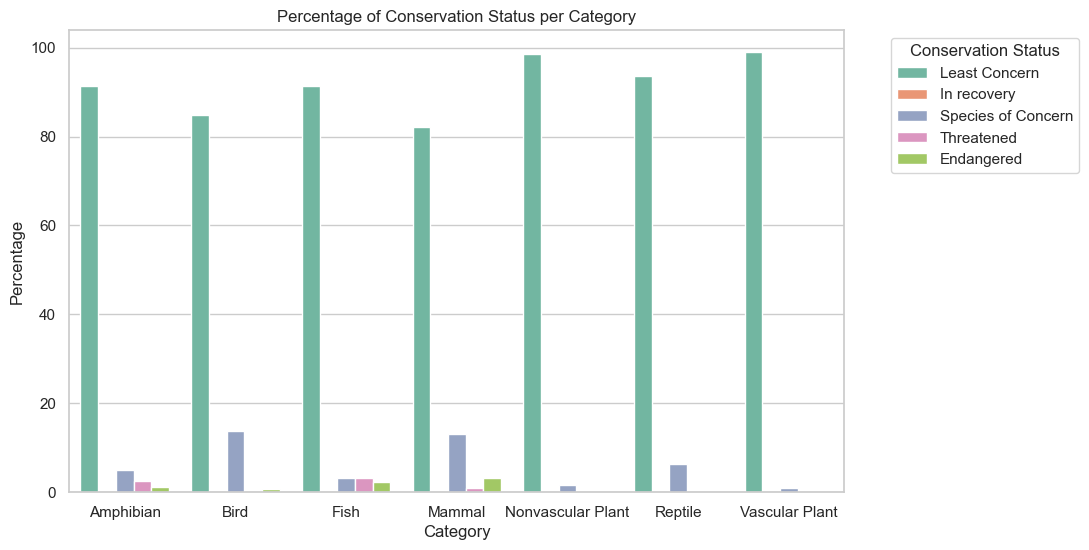

In [13]:
# Get the unique conservation statuses and define the desired order
unique_statuses = species['conservation_status'].unique()
order = ['Least Concern', 'In recovery', 'Species of Concern', 'Threatened', 'Endangered']


# Calculate the percentage of each conservation status per category
percentage_df = species.groupby(['category', 'conservation_status']).size() / species.groupby('category').size() * 100
percentage_df = percentage_df.reset_index(name='percentage')

# Plotting with Seaborn using the specified order
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x="category", y="percentage", hue="conservation_status", data=percentage_df, palette="Set2", hue_order=order)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Conservation Status per Category')

# Add legend
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.savefig('output_plots/Percentage_conservation_status_per_category.png')

# Show the plot
plt.show()

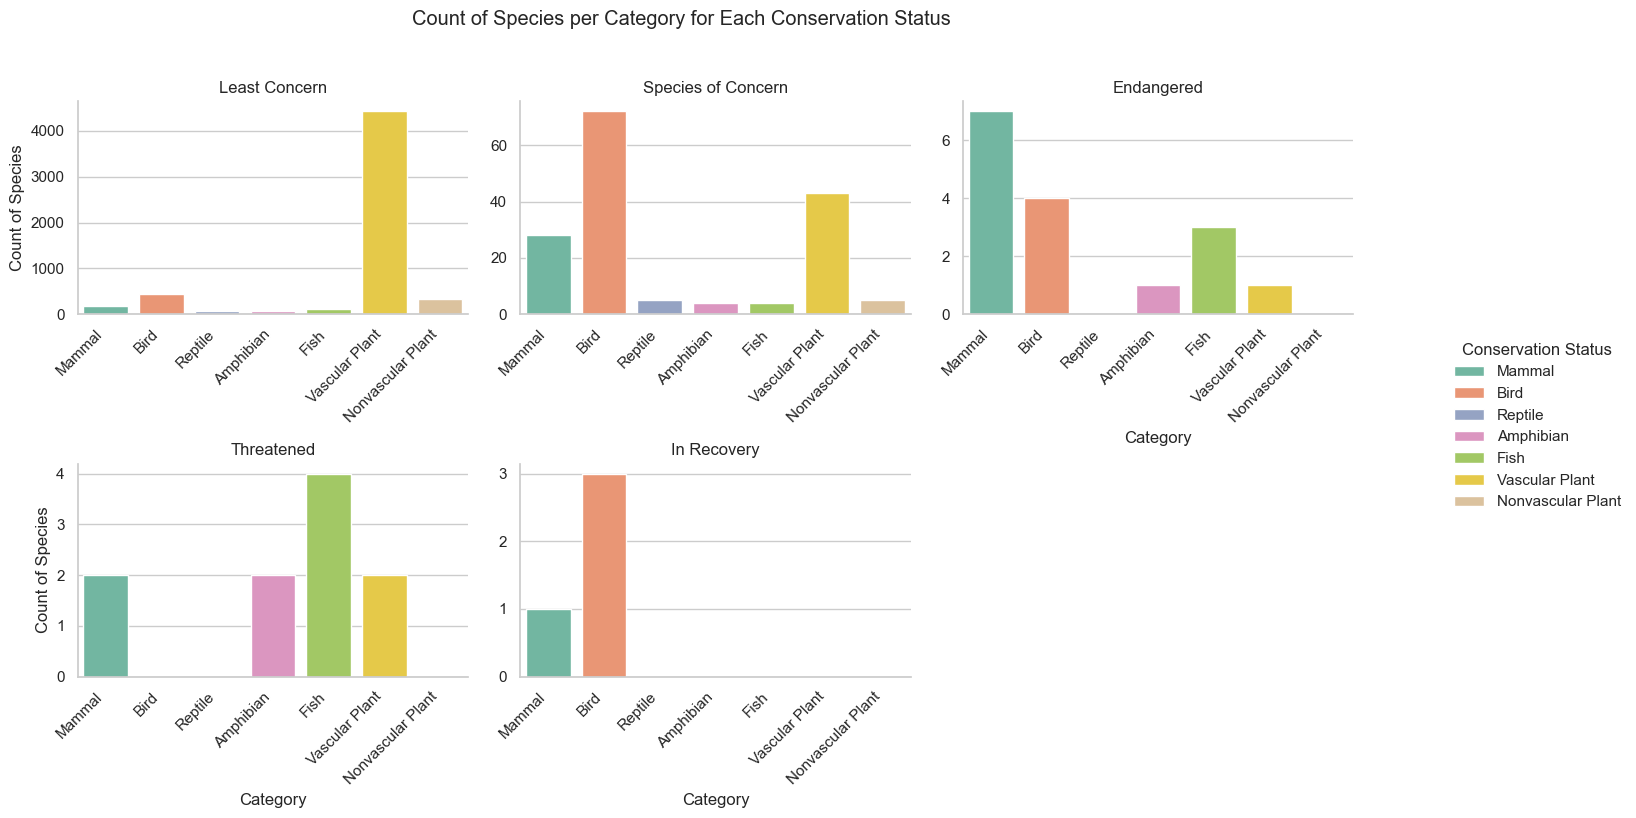

In [72]:
# Create a FacetGrid for each conservation status
g = sns.FacetGrid(
    species,
    col="conservation_status",
    hue="category",
    col_wrap=3,
    height=4,
    sharey=False,
    sharex=False,
    palette="Set2",
)
g.map(sns.countplot, "category", order=species["category"].unique())

# Set labels and title
g.set_axis_labels("Category", "Count of Species")
g.set_titles(col_template="{col_name}")
plt.suptitle("Count of Species per Category for Each Conservation Status", y=1.02)

# Add legend manually if needed
g.add_legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left")

for ax in g.axes.flat:
    ax.set_xticks(range(len(species['category'].unique())))
    ax.set_xticklabels(species['category'].unique(), rotation=45, ha='right')

# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()

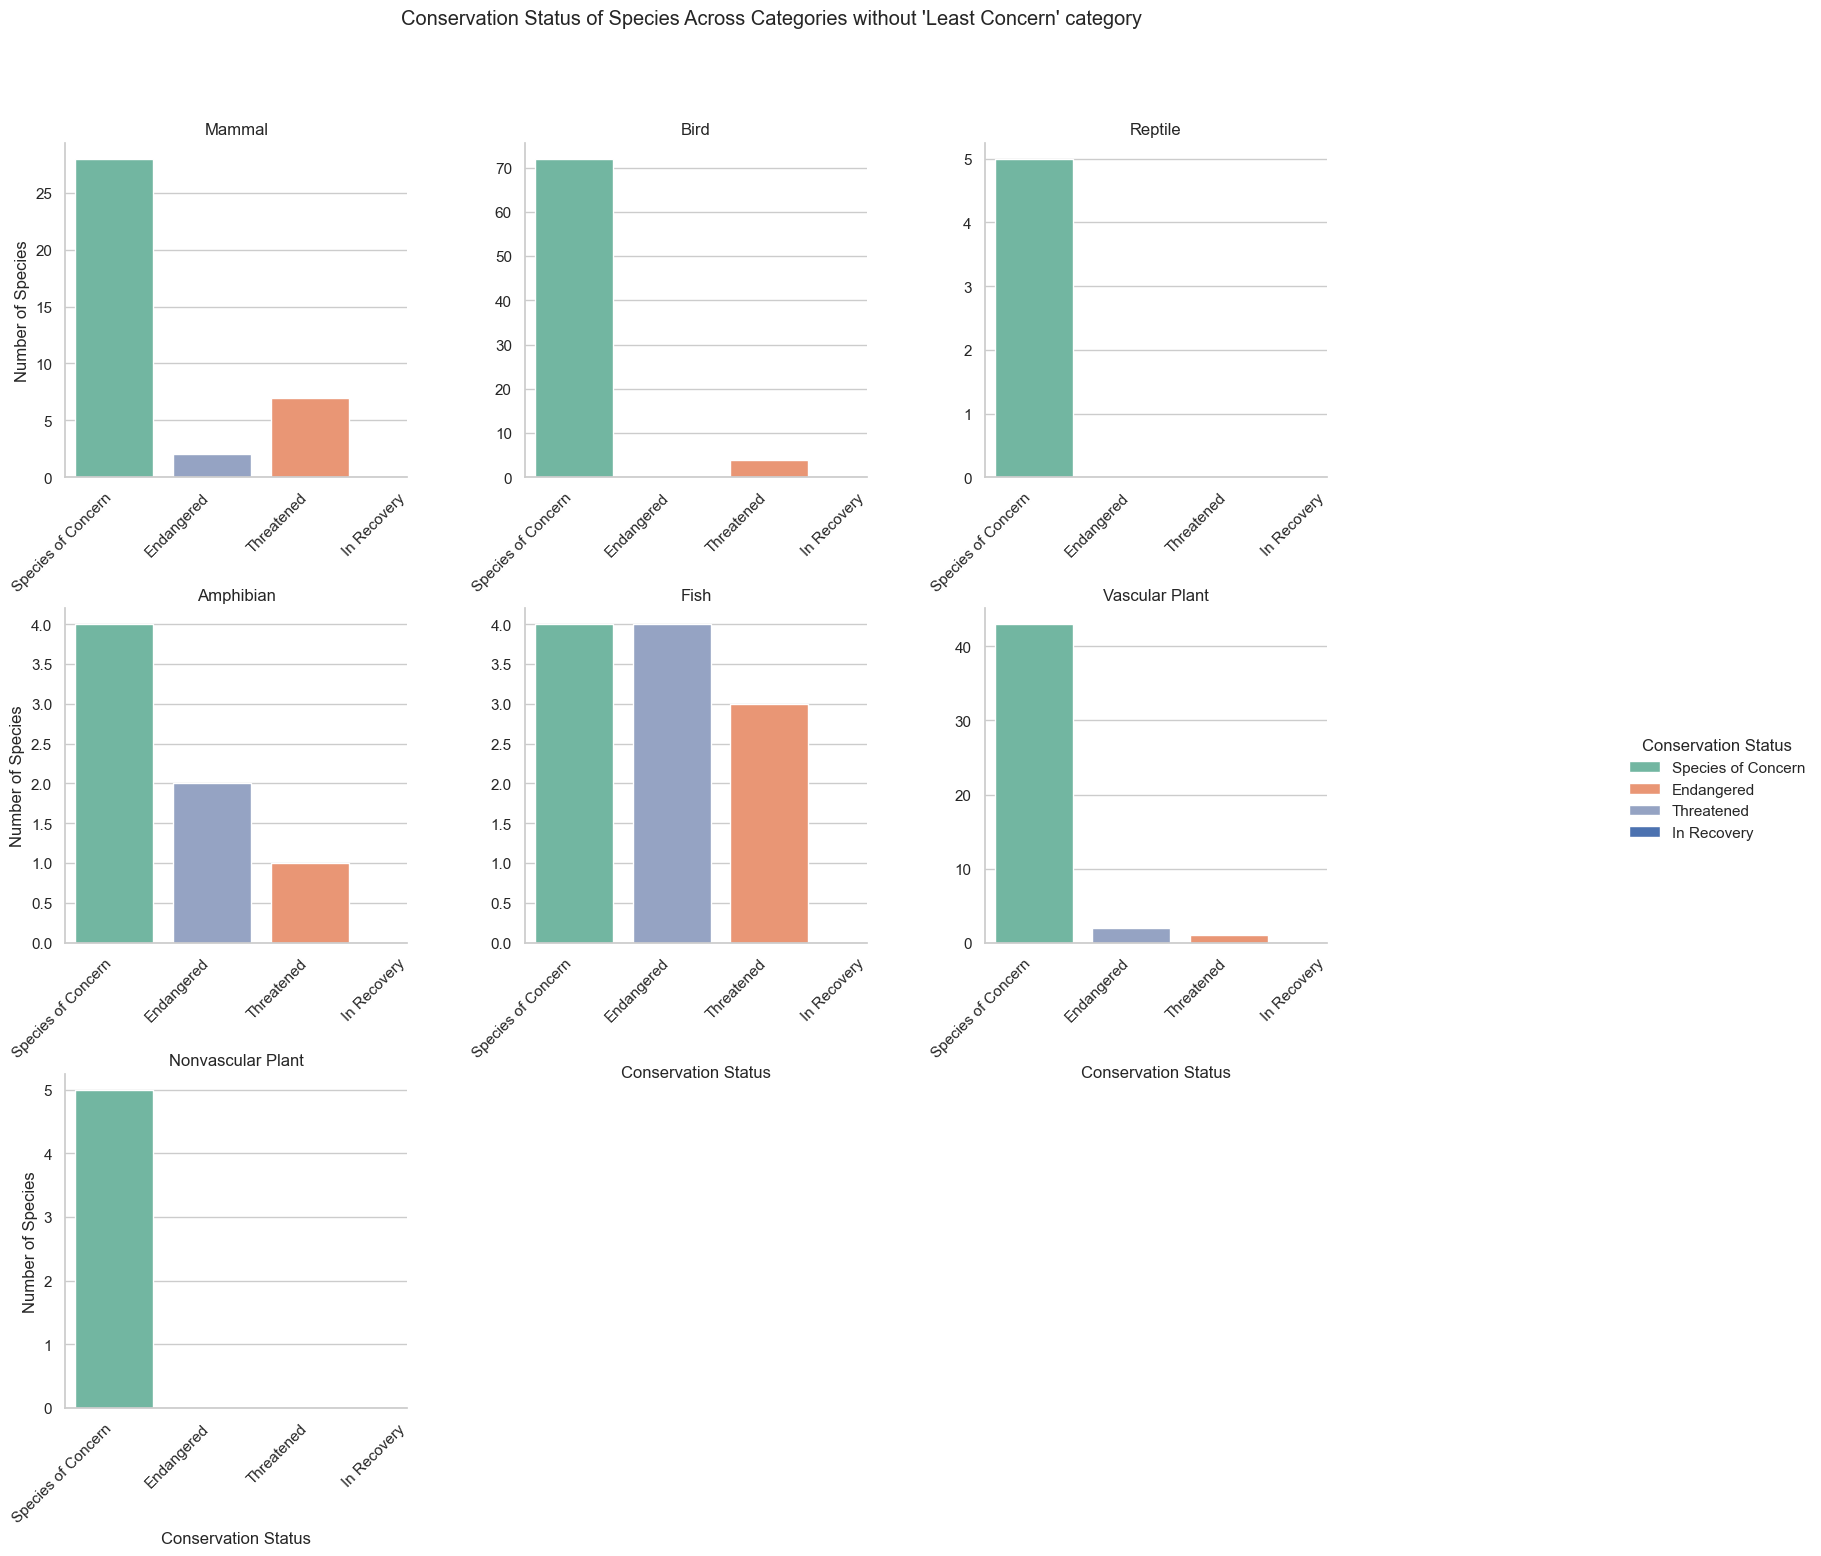

In [84]:
# Set the order of conservation statuses for better visualization
conservation_order = ["Species of Concern", "Threatened", "Endangered"]

# Set a consistent color palette
colors = sns.color_palette("Set2", n_colors=len(conservation_order))

# Output directory to save the plots
output_directory = "output_plots"
os.makedirs(output_directory, exist_ok=True)

# Filter out 'Least Concern' category
filtered_species = species[species['conservation_status'] != 'Least Concern']

# Create a FacetGrid
g = sns.FacetGrid(
    filtered_species, col="category", col_wrap=3, height=5, hue="conservation_status", palette="Set2", sharey=False, sharex=False
)

# Map the countplot onto the grid
g.map(sns.countplot, "conservation_status", order=conservation_order)

# Set labels and title
g.set_axis_labels("Conservation Status", "Number of Species")
g.set_titles(col_template="{col_name}")

# Customize legend position
g.add_legend(title="Conservation Status", bbox_to_anchor=(1, 0.5), loc="center left")

# Use tight_layout to adjust the layout
g.tight_layout(pad=5)

# Set the xticks and labels
for ax in g.axes.flat:
    ax.set_xticks(range(len(filtered_species['conservation_status'].unique())))
    ax.set_xticklabels(filtered_species['conservation_status'].unique(), rotation=45, ha='right')

# Set a title for the entire FacetGrid
g.fig.suptitle("Conservation Status of Species Across Categories without 'Least Concern' category", y=1.02)

# Save the plots as PNG files
# for ax, category in zip(g.axes.flat, g.col_names):
#     output_file_path = os.path.join(
#         output_directory, f"{category}_conservation_status_plot.png"
#     )
#     ax.get_figure().savefig(output_file_path, bbox_inches="tight")
    

# Show the plots
plt.show()